# Data Science Toolbox
### Author: Julian Kleindiek
### Date: 01/21/2020

This document serves as a library of my Data Science Toolbox. I use it to store all techniques that I have learned throughout my Master in Analytics at the University of Chicago. I learned about these techniques in classes such as Statistical Analysis, Non-Linear Models, Data Mining, Machine Learning, and Advanced Machine Learning and applied them in several projects that I have worked on with my fellow students. 

The document is structured along the typical pipline of a data science project: 
1. Data Exploration
2. Feature Engineering
3. Data Clustering
4. Data Modeling
5. Evaluation of Model Performance

I have also added a section that describes that data that I have used throughout this document in order to present examples of each technique. Here are some examples of the techniques that I cover in this document:
- Dimension Reduction:
    * Principal Component Analysis
    * Truncated SVD
- Clustering:
    * t-SNE
    * K-Means
    * DBSCAN
    * Hierarchical Clustering
- Modelling:
    * Linear Regression
    * Logistic Regression
    * K-Nearest Neighbor
    * Decision Trees
    * Random Forrest
    * General Linear Regression Models
    * Copulas
    * Zero Truncated Models
    * Kernel SVM
    * Apriori Algorithm
    * Collaborative Filtering
    * Content Based Recommendations

# 1. Data Exploration

### Kernel Density Estimation
- Application: Kernel Density Estimation (KDE) is used to find the true distribution of the data and can be used to generate new data points once those parameters are found.
- Description: KDE is a non-parametric way of estimation to get probability density function to understand the distribution of the underlying data.
- Functionality:
    * We start by selecting a kernel function (i.e. Gaussian, triangle) and generate such function for each data point. We usually apply Gaussian.
    * To get a true representation of our data, we then aggregate those functions acorss data points
    * The resulting kernel density estimate is hence the aggregation of all individual kernel functions
    * The first parameter to specify is the bandwith, determining the width of a kernel function and hence the smoothness of the resulting curve. The higher the bandwidth, the smoother the fitted distribution line.
    * The second parameter to specify is the distribution of the kernel function. The bandwidth also effects the individual kernel functions. The lower the bandwidth, the higher the kernel function.
    * The bandwidth can be calculated as: $0.9 * min(\sigma, \frac{IQR}{1.34}) * n^ {\!-1/5}$
    * Alaternatively, we can plot the KDE with different parameters and observe and finetune the results
- Limitations: Histogramms might make the job if I'm just interested in the distribution of the data.
- Examples:

In [9]:
# run example here (Data Mining, class 4)

### ~ Kolmogorov-Smirnov

# 2. Feature Engineering

## Standardization

### StandardScalar()
- Application: StandardScalar is applied to data columns and hence only one feature.
- Description: StandardScalar standardizes features individually by removing the mean and scaling to unit variance ($ z = \frac{x - u}{s} $). Unit variance means that the standard deviation of a sample as well as the variance will tend towards 1 as the sample size tends towards infinity.

In [26]:
# import packages
import pandas as pd
from sklearn.preprocessing import StandardScaler

# load data
iris = pd.read_csv("00_Data/Iris.csv", usecols=["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"])
print(iris.describe())

# initiate StandardScaler()
scaler = StandardScaler()

# fit scaler and transform iris data
iris_standard_scaler = scaler.fit_transform(iris)

# print standardized data
print(pd.DataFrame(iris_standard_scaler, 
                   columns = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]).describe())

       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.843333      3.054000       3.758667      1.198667
std         0.828066      0.433594       1.764420      0.763161
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.350000      1.300000
75%         6.400000      3.300000       5.100000      1.800000
max         7.900000      4.400000       6.900000      2.500000
       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count   1.500000e+02  1.500000e+02   1.500000e+02  1.500000e+02
mean   -2.775558e-16 -5.140333e-16   1.154632e-16  9.251859e-16
std     1.003350e+00  1.003350e+00   1.003350e+00  1.003350e+00
min    -1.870024e+00 -2.438987e+00  -1.568735e+00 -1.444450e+00
25%    -9.006812e-01 -5.877635e-01  -1.227541e+00 -1.181504e+00
50%    -5.250608e-02 -1.249576e-01   3.3

### Normalizer()
- Application: Normalizer is applied to data rows and hence across features.
- Description: Normalizer rescales each row, meaning that it adjusts the value of each feature relative to the value of the other features in each row to a realative scale.

In [25]:
# import packages
import pandas as pd
from sklearn.preprocessing import Normalizer

# load data
iris = pd.read_csv("00_Data/Iris.csv", usecols=["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"])
print(iris.head())

# initiate StandardScaler()
scaler = Normalizer()

# fit scaler and transform iris data
iris_normlized = scaler.fit_transform(iris)

# print standardized data
print(pd.DataFrame(iris_normlized, 
                   columns = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]).head())

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2
3            4.6           3.1            1.5           0.2
4            5.0           3.6            1.4           0.2
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0       0.803773      0.551609       0.220644      0.031521
1       0.828133      0.507020       0.236609      0.033801
2       0.805333      0.548312       0.222752      0.034269
3       0.800030      0.539151       0.260879      0.034784
4       0.790965      0.569495       0.221470      0.031639


## Variance

### VarianceThreshold()
- Application: VarianceThreshold() is applied for feature selection and identifies low variance features that won't be significant in predicting the target variable.
- Description: VarianceThreshold() is a feature selector that removes all low-variance features.

In [120]:
# imports
from sklearn.feature_selection import VarianceThreshold

# create data frame
x = [[0, 2, 0, 3], [0, 1, 4, 3], [0, 1, 1, 3]]
df = pd.DataFrame(x, columns = ["a", "b", "c", "d"])

# initialize VarianceThreshold
selector = VarianceThreshold()

# fit model and transform data frame
df_new = selector.fit_transform(df)

# print results
print("These are the infos on the original data frame:", "\n", df.describe())
print("This is how the transformed data frame looks like:", "\n", 
      pd.DataFrame(df_new, columns = df.columns[selector.get_support()]))

These are the infos on the original data frame: 
          a         b         c    d
count  3.0  3.000000  3.000000  3.0
mean   0.0  1.333333  1.666667  3.0
std    0.0  0.577350  2.081666  0.0
min    0.0  1.000000  0.000000  3.0
25%    0.0  1.000000  0.500000  3.0
50%    0.0  1.000000  1.000000  3.0
75%    0.0  1.500000  2.500000  3.0
max    0.0  2.000000  4.000000  3.0
This is how the transformed data frame looks like: 
    b  c
0  2  0
1  1  4
2  1  1


## Correlation

### Correlation Matrix
- Application: Correlation matrix is applied for feature selection and identifies highly correlated features that should be removed.
- Description: Find the correlation matrix and remove features that are highly correlated.

In [125]:
# load data
iris = pd.read_csv("00_Data/Iris.csv", usecols=["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"])

# run correlation matrix
iris.corr(method = "pearson")[(iris.corr(method = "pearson") > 0.9) & (iris.corr(method = "pearson") != 1)]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,NaN,NaN,NaN,NaN
SepalWidthCm,NaN,NaN,NaN,NaN
PetalLengthCm,NaN,NaN,NaN,0.962757
PetalWidthCm,NaN,NaN,0.962757,NaN


## Text

### TfidfVectorizer()
- Application: TfidfVectorizer is applied to convert text (documents) into numerical values, namely a matrix of tf-idf features.
- Description: 
    * Tf–idf is short for term frequency–inverse document frequency and represents a numerical statistic that is intended to reflect how important a word is to a document.
    * The tf–idf value increases proportionally to the number of times a word appears in the document and is offset by the number of documents in the corpus that contain the word, helping to adjust for the fact that some words appear more frequently in general.

In [113]:
# imports
from sklearn.feature_extraction.text import TfidfVectorizer

# create list of text documents
corpus = ["cats greet cats", "dogs say woof to dogs", "dogs chase cats"]

# initialize TfidfVectorizer
vectorizer = TfidfVectorizer()

# fit vectorizer
vectorizer.fit(corpus)

# transform the document
corpus_vectorized = vectorizer.transform(corpus)

# print results
print("The unique words in the corpus are:", "\n", vectorizer.get_feature_names())
print("The resulting matrix looks like this:", "\n", corpus_vectorized.toarray())

The unique words in the corpus are: 
 ['cats', 'chase', 'dogs', 'greet', 'say', 'to', 'woof']
The resulting matrix looks like this: 
 [[0.83559154 0.         0.         0.54935123 0.         0.
  0.        ]
 [0.         0.         0.65985664 0.         0.43381609 0.43381609
  0.43381609]
 [0.51785612 0.68091856 0.51785612 0.         0.         0.
  0.        ]]


### CountVectorizer()
- Application: CountVectorizer is applied to count the number of times a word appears in a document. 
- Description:
    * Returns a vector with a length of the entire vocabulary of the document and an integer count for the number of times each word (token) appeared in the document.
    * The output is presented as a sparse matrix.

In [114]:
# imports
from sklearn.feature_extraction.text import CountVectorizer

# create list of text documents
corpus = ["cats greet cats", "dogs say woof to dogs", "dogs chase cats"]

# initialize the CountVectorizer
vectorizer = CountVectorizer()

# fit the vectorizer
vectorizer.fit(corpus)

# transform the document
corpus_vectorized = vectorizer.transform(corpus)

# print results
print("The unique words in the corpus are:", "\n", vectorizer.vocabulary_)
print("The resulting matrix looks like this:", "\n", corpus_vectorized.toarray())

The unique words in the corpus are: 
 {'cats': 0, 'greet': 3, 'dogs': 2, 'say': 4, 'woof': 6, 'to': 5, 'chase': 1}
The resulting matrix looks like this: 
 [[2 0 0 1 0 0 0]
 [0 0 2 0 1 1 1]
 [1 1 1 0 0 0 0]]


### ~ Keyword Extraction
- See data mining class 7

### ~ Word Embeddings

## Anomaly Detection

### ~ AutoEncoder

### ~ Synthetic Minority Oversampling Technique

## Dimension Reduction

### Principle Component Analysis
- Application: PCA is applied to reduce the dimensionality of data and to find patterns in data of high dimension.
- Desciption: PCA is able to represent the original data in a given number of components. The number of components should be reduced as much as possible, while still describing >85% of the data's variance.
- Functionality:
    * We have a point cloud and want to find its major/minor direction
    * This point cloud is centered at mu, but we want to re-center it at the origin (subtract the column means)
    * We then rotate the matrix to be more axis-aligned by multiplying it with an orthogonal matrix and make the columns orthonormal; mathematically, the columns of our matrix are now uncorrelated
    * We then perform matrix singular value decomposition on the above described matrix into eigenvectors and eigenvalues (this can also be performed on the covariance matrix between columns)
    * The eigenvalues represent the variance described by the corresponding eigenvector (component/loading)
    * We now sort the eigenvalues in descending order in order to select as many components necessary to describe our original data well enough
- Limitations: PCA assumes linear relationships between data points and is usually just a pre-processing step.
- Example:

In [ ]:
# run an example

### Truncated Singular Value Decomposition (SVD)
- Application: Truncated SVD is applied for text mining. It reduces dimensions of text data and is a pre-preparation tool for the clustering of text data.
- Description: Compared to PCA where we have to specify the number of components that we want to reduce the dimensionality of our data to, Truncated SVD reduces the dimensions/creates components automatically based on low eigenvalues. Technically it is only a matrix decomposition and not an algorithm.
- Functionality:
    * We first have to transform text into features with numerical values: There are several techniques such as CountVectorizer or TfidfVectorizer
    * We then perform SVD on the numerical matrix like we do in PCA
    * The algorithm then automatically selects the number of components to keep for further analysis
- Limitations: Text data needs to be vectorized before Truncated SVD can be applied to it. Truncated SVD is usually just a pre-processing setp.
- Example:

In [1]:
# run an example

# 3. Data Clustering
This section presents several unsupervised learning algorithms in the following way:
- Application: When should this algorithm be used?
- Description: What does this algorithm do (high-level)?
- Functionality: How does this algorithm work (drill-down)?
- Limitations: What does one have to keep in mind when using this algorithm?
- Example: How is this algorithm applied?

### t-SNE

- Application: t-SNE is used in the initial stage of data exploration (quick & dirty approach).
- Description: t-SNE visualizes multi-dimensional data in two dimensions and it clusters the data in this two dimensional space, while preserving the relative distance of the data points.
- Functionality:
    * Start with one data point and calculate its distance to all other data points
    * Plot a normal distribution on top of the one data point that is in the center of the distribution
    * Plot the distances to the other poitns under the normal distribution
    * The height of the data point to the curve is called the similarity score (the higher the distance, the lower the height of the bar)
    * Plot the similarity scores in one dimension: High scores atttract each other, low scores repel each other
    * As a result, data points with high similarity are close to each other
    * If a t-Distribution is used instead of a normal distribution,we can better differentiate points further away from the first points because of their fatter tails  
    * Perplexity: Illustrates a guess about the number of close neighbors each point has; sqrt(n data points); usually 5-50
    * Learning rate: Intensity of how data points repel/attrach each other based on their similarity scores; usually 10-1,000
- Limitations: t-SNE should be used for data exploration only and not as input for other methods or models. The reason is that it is heuristig, meaning that its output changes every time the algorithm is executed.
- Example:

In [9]:
# imports 
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE

# load data
iris = pd.read_csv("00_Data/Iris.csv")

# take a look at dataframe
print("This dataframe has {} rows and {} columns.".format(iris.shape[0], iris.shape[1]))
print(iris.head())

# create array
x = iris.iloc[:, 1:5].values

This dataframe has 150 rows and 6 columns.
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


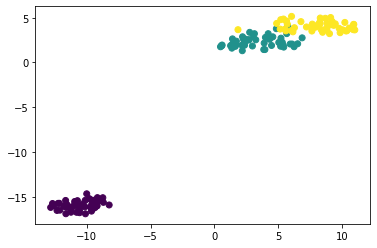

In [15]:
## TSNE package

# initiate the model
tsne = TSNE(learning_rate = 100, perplexity = 40)

# fit the model and transform the data
x_tsne = tsne.fit_transform(x)

# plot the results
plt.scatter(x_tsne[:,0], x_tsne[:,1], c=iris["Species"].astype('category').cat.codes)
plt.show()

### K-Means
- Application: K-Means is applied to cluster data into a pre-determined number of homogeneous clusters.
- Description: K-Means minimizes the dispersion of data points within clusters by categorizing data point to the cluster with the nearest mean. Usually the euclidean distance is used to measure distances.
- Functionality:
    * We start with k initial clusters
    * We randomly place the k centorids in the data (the better this initial guess is, the quicker will the algorithm find the true clusters)
    * In the next step, each observation is assigned to the cluster with the closest centorid
    * We then recompute the centroids of the clusters that lost or gained an observation from the above step
    * We stop this when moving any more obervations increases the cluster dispersion/when the distance between the new and old centroids is 0 (meaning that reasigning data points doesn't change the centroids)
- Limitations: We have to find and defind the ideal number of clusters. K-Menas performance is limited for non-globular data structures
- Examples:

In [1]:
# imports 
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from copy import deepcopy
from sklearn.cluster import KMeans

# load data
clara = pd.read_csv("00_Data/Xclara.csv")

# take a look at the data frame
print("This dataframe has {} rows and {} columns.".format(clara.shape[0], clara.shape[1]))
print(clara.head())

# create array
x = clara.loc[:, ["V1", "V2"]].values

This dataframe has 3000 rows and 2 columns.
          V1         V2
0   2.072345  -3.241693
1  17.936710  15.784810
2   1.083576   7.319176
3  11.120670  14.406780
4  23.711550   2.557729


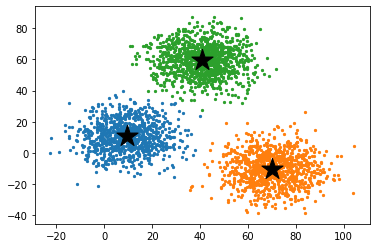

In [2]:
## Manual calculation

# define a function to calculate the euclidean distance
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

# set a number of clusters
k = 3

# randomly generate k centroids
c_x = np.random.randint(0, np.max(x)-20, size=k)
c_y = np.random.randint(0, np.max(x)-20, size=k)
c = np.array(list(zip(c_x, c_y)), dtype=np.float32)

# initialize array to store updated centroids
c_old = np.zeros(c.shape)

# initialize labels for the clusters
clusters = np.zeros(len(x))

# initialize error (distance between old and new centroids)
error = dist(c, c_old, None)

# develop loop to calculate k-means clusters:
while error != 0:
    # assign each value to its closest cluster
    for i in range(len(x)):
        distances = dist(x[i], c)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    # store the old centroid values
    c_old = deepcopy(c)
    # find the new centroids by taking the average value
    for i in range(k):
        points = [x[j] for j in range(len(x)) if clusters[j] == i]
        c[i] = np.mean(points, axis=0)
    error = dist(c, c_old, None)

# plot the clusters
fig, ax = plt.subplots()
for i in range(k):
    points = np.array([x[j] for j in range(len(x)) if clusters[j] == i])
    ax.scatter(points[:, 0], points[:, 1], s=5)
plot = ax.scatter(c[:, 0], c[:, 1], marker='*', s=500, c='black')

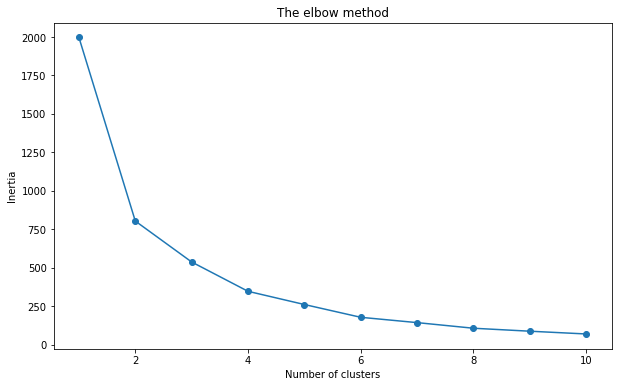

In [60]:
## K-Means package

# find ideal number of clusters
def plot_inertia(array, start=1, end=10):
    
    # claculate interias
    inertia = []
    ks = range(start, end+1)
    
    for k in ks:
        model = KMeans(n_clusters = k, random_state = 0).fit(array)
        inertia.append(model.inertia_)
    
    # plot interias
    fig, ax = plt.subplots(figsize=(10,6))
    plt.plot(ks, inertia, '-o')
    ax.set_title('The elbow method')
    ax.set_ylabel('Inertia')
    ax.set_xlabel('Number of clusters')
    plt.show()
    
    # return plot
    return ax

inertia = plot_inertia(x)

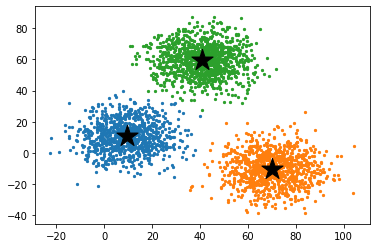

In [5]:
# set number of clusters
n_cluster = 3

# instantiate kmeans with 3 clusters
kmeans = KMeans(n_clusters = n_cluster)

# fit kmeans to the input data
kmeans = kmeans.fit(x)

# create cluster labels
labels = kmeans.predict(x)

# extract centroids
centroids = kmeans.cluster_centers_

# plot the clusters
fig, ax = plt.subplots()
for i in range(n_cluster):
    points = np.array([x[j] for j in range(len(x)) if labels[j] == i])
    ax.scatter(points[:, 0], points[:, 1], s = 5)
plot = ax.scatter(centroids[:, 0], centroids[:, 1], marker = '*', s = 500, c = 'black')

### DBSCAN
- Application: DBSCAN is used to find non-globular clusters based on a given radius, meaning that it can discover clusters of arbitrary shape.
- Description: DBCSAN is a density-based clustering algorithm that groups points that are close to each other and marks points as outliers if they lie alone in low-density regions (whose nearest neighbors are too far away).
- Functionality:
    * We pick a point at random that has not been assigned to a cluster or as an outlier
    * For this point, we compute its neighborhood to determine if it's a core point. If yes, we start a cluster with it. If no, we label t as an outlier
    * Once we find a core point, we expand the cluster by adding all directly reachable points and also perform neighborhood jumps to find all density-reachable points and add them to the cluster
    * We repeat these two steps until all points are assigned to a cluster of defined as an outlier 
    * Core points: Our clusters are built around our core points (hence the core part), so by adjusting our minPts parameter, we can fine-tune how dense our clusters cores must be.
    * Border Points: Also called density-reachable points. As an analogy, we can think of density-reachable points as being the “friends of a friend”. 
    * Outliers: Points that are neither core points nor are they close enough to a cluster to be density-reachable from a core point
    * We need to assign two parameters: Epsilon (radius) and minPts (min number of data points that we want to have in the neighborhood)
- Limitations: While DBSCAN is great at separating high density clusters from low density clusters, DBSCAN struggles with clusters of similar density. DBSCAN also stuggles with data of very high dimensions
- Examples:

In [57]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

# load data
x, y = make_moons(n_samples = 2000, noise = 0.04)

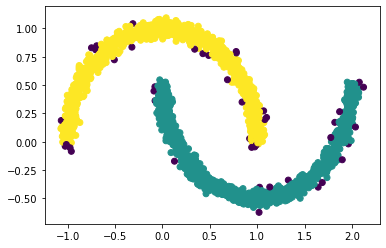

In [59]:
## DBSCAN package

# initialize model
dbscan = DBSCAN(eps = 0.05, min_samples = 10)

# fit model
dbscan.fit(x)

# get the labels
labels = dbscan.labels_

# plot results
plt.scatter(x[:,0], x[:,1], c=labels)
plt.show()

### Hierarchical Clustering
- Application: Hierarchical Clustering is used to get visual insights into clusters without any prior information and the need to specify the number of clusters a priori.
- Description: Hierarchical Clustering build a hierarchy of clusters visualize them in dendrograms, revealing more information than non-hierarchical algorithms that returns a unique partition.
- Functionality (agglomerative):
    * At the start, we treat each data point as one cluster; the number of clusters will be k, representing the number of data points
    * We then form a cluster by joining the two clostest data points, resulting in k-1 clusters
    * We then form more clsuters by joining the two closest clusters, resulting in k-2 clusters
    * We repeat the above steps until one single cluster is formed
    * Once the one single cluster is formed, we develop dendrograms to divide the one single cluster into its sub-clusters
    * The height of the dendrograms represent the distances between the data points; the earlier the clusters form the better
    * We can fine-tune groups by adjusting the allowed height, only returning clusters formed until a defined heigth
    * There are three methods to approximate the distances between the clusters: single/min, complete/max, ward/distance (minimizing information loss); if the pattern is similar, good, otherwise we can assume there is noise in the data
- Limitations: Hierarchical Clustering has high time-complexity and can be difficult to read for large datasets.
- Examples:

In [2]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

# load data
movements = pd.read_csv("00_Data/Movements.csv")

# take a look at dataframe
print("This dataframe has {} rows and {} columns.".format(movements.shape[0], movements.shape[1]))
print(movements.head(1))

# prepare data
x = movements.iloc[:,1:].values
companies = [i for sublist in movements.iloc[:,:1].values for i in sublist]

# normalize data
from sklearn.preprocessing import Normalizer
scaler = Normalizer()
x = scaler.fit_transform(x)

This dataframe has 60 rows and 964 columns.
  Unnamed: 0  2010-01-04  2010-01-05  2010-01-06  2010-01-07  2010-01-08  \
0      Apple        0.58   -0.220005   -3.409998       -1.17    1.680011   

   2010-01-11  2010-01-12  2010-01-13  2010-01-14  ...  2013-10-16  \
0   -2.689994   -1.469994    2.779997   -0.680003  ...    0.320008   

   2013-10-17  2013-10-18  2013-10-21  2013-10-22  2013-10-23  2013-10-24  \
0    4.519997    2.899987    9.590019   -6.540016    5.959976    6.910011   

   2013-10-25  2013-10-28  2013-10-29  
0   -5.359962    0.840019  -19.589981  

[1 rows x 964 columns]


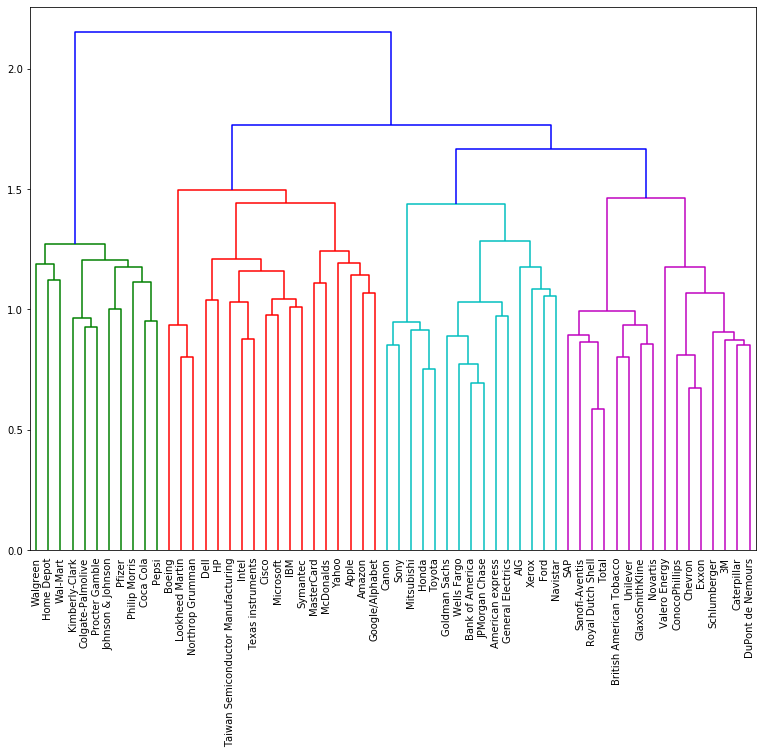

In [3]:
## Hierarchy package

# calculate the linkage: mergings
mergings = linkage(x, method='ward')

# plot the dendrogram
plt.figure(figsize=(13,10))
dendrogram(mergings, labels=companies, leaf_rotation=90, leaf_font_size=10)
plt.show()

In [7]:
## AgglomerativeClustering package

# imports 
from sklearn.cluster import AgglomerativeClustering

# initialize
agglom = AgglomerativeClustering(n_clusters = 4)

# fit the model
agglom.fit(x)

# extract labels
labels = agglom.labels_

# create data frame
df = pd.DataFrame({"comapny": companies, "labels": labels})

# print sorted data frame
df.sort_values("labels").head(18)

,comapny,labels
0,Apple,0
51,Texas instruments,0
50,Taiwan Semiconductor Manufacturing,0
47,Symantec,0
36,Northrop Grumman,0
33,Microsoft,0
31,McDonalds,0
30,MasterCard,0
24,Intel,0
23,IBM,0


# 4. Data Modeling
This section presents several supervised learning algorithms in the following way:
- Application: When should this algorithm be used?
- Description: What does this algorithm do (high-level)?
- Functionality: How does this algorithm work (drill-down)?
- Limitations: What does one have to keep in mind when using this algorithm?
- Example: How is this algorithm applied?

### Linear Regression
- Application: Linear Regression is used to quanify the strength of the linear relationship between a target and explanatory variables and based on this relationship predict the target variable.
- Description: Linear Regression is a linear approach to model the relationship between a scalar target variable and one or more explanatory variables applying i.e. least squares minimization.
- Functionality:
    * We can think of a Linear Regression as an orthogonal projection of the target variable $(\vec{y})$ onto the $span($$\vec{1}$, $\vec{x}$$)$
    * The equation for a Linear Regression is: $y$ = $\beta_{\,0}$ + $\beta_{\,1}$$x_{\,1}$ + ... + $\beta_{\,n}$$x_{\,n}$ + $\epsilon$
    * Our goal is to minimize the following adjusted form of the above equation (in vector form): $||$ $\vec{y}$ - ($\vec{\beta}_{\,0}$*$\vec{1}$ + $\vec{\beta}_{\,1}$*$\vec{x}_{\,1}$ + ... + $\vec{\beta}_{\,n}$$\vec{x}_{\,n}$) $||^{\,2}$
    * In order to minimize this equation, we optimize $\vec{\beta}$ to find a linear combination of $\vec{1}$ and $\vec{x}$ that is as close to our target variable $\vec{y}$ as possible
    * We achieve this by projecting $\vec{y}$ onto the $span($$\vec{1}$, $\vec{x}$$)$, representing our predicted values
    * The residuals of the model are the differences between the actual values and the predicted values
    * Key assumptions: Linearity, homoscedasticity (variance of residual is the same for any value of X), independence, residuals are normall ydistributed
- Limitations: Linear Regression requires linearity between the target and explanatory variables. It is also very sensitive to outliers and assumes no multicollinearity, meaning relationships between the explanatory variables
- Note: If $y$ is not normally distributed, we need to fit Generalized Linear Models (i.e. $y$ ~ $Binom$, $y$ ~ $Poiss$, $y$ ~ $Gamma$), which are estimated with the Maximum Likelihood function and have different links connecting the linear predictor and the expectation of the output (i.e. logit, probit, complementary log-log)
- Example:

In [19]:
# run an example (see python assignemnt 3)

### Logistic Regression
- Application: Logistic Regression is used to model the probabilities for a binary target variable/event/class.
- Description: Logistic Regression is a non-linear classification model that is expressed as a linear model. It models probabilities for a binary target variable based on many more explanatory variables from different domains (categorical and/or continuous variable).
- Functionality:
    * The odds of the event $Y=1$ to happen can be represented as $\left ( \frac{p}{1-p} \right )$
    * We now want to bound this value between 0 and 1 and in order to do so, we can apply different transformations such as $log(odds) = logit(P) = ln\left ( \frac{p}{1-p} \right )$
    * We also consider a linear model with a target and multiple explanatory variables
    * Further we assume a linear relationship between the explanatory variables and the $log(odds)$ of the event $Y=1$
    * This relationship can be represented as: $ln\left ( \frac{p}{1-p} \right ) = $ $\beta_{\,0}$ + $\beta_{\,1}$$x_{\,1}$ + ... + $\beta_{\,n}$$x_{\,n}$ (these values don't have to be the same, we only describe the linear relationship with this equation)
    * We now apply the Sigmoid Function (inverse of the logit function) to solve the above equation for the probability that $Y=1$
    * The result for the probability that $Y=1$ is: $p = {\frac{exp(\beta_0 + \beta_1x_1)}{1 + exp (\beta_0 + \beta_1x_1)}}$


- Limitations: Logistic Regression can only predict a categorical outcome and cannot solve non-linear problems because it's decision surface is linear.
- Example:

In [21]:
# run an example (see python for analytics class 7)

### K-Nearest Neighbors
- Application: K-Nearest Neighbors (KNN) is used for classification or regression.
- Description: KNN identifies the k nearest points in the data and estimates the target based on this set of k nearest points.
- Functionality:
    * First, we have to define k, the number of neighbors we are looking for (this number is usually small)
    * For classification: The target is classified by a plurality vote of the k nearest neighbors. The class is determined by the most common class among the k nearest neighbors. If $k = 1$, then the object is simply assigned to the class of that single nearest neighbor.
    * For regression: The target is estimated simply by the average of the values of the k nearest neighbors.
    * It is common to assign weights to the contributions of the neighbors in order for nearer neighbors to contribute more to the target than the more distant ones.
- Limitations: KNN is a lazy learner, meaning that it does not learn from the training data but rather uses it its prediction. This means its not generalizing well and is not robust to noisy data. KNN is also rather slow, because it has to compute the distance to all points in the training set and then sort them at each prediction.
- Example:

In [ ]:
# run an example here

### Apriori Algorithm
- Application: Apriori is used to find relationships/associations of items in data sets (i.e. market basked analysis).
- Description: Apriori determines item sets that appear sufficiently often together in the data. These item sets are used to define association rules which highlight general trends in the data.
- Functionality:
    * The algorithm is based on the following three constructs: Support, Confidence, and Lift. When running the algorithm, we have to define minimum values for each of the three consturcts
    * Support: Represents the popularity of an item $Support(B) = \frac{trx_B}{trx_{all}}$
    * Confidence: Represents the likelihood that item $B$ is also purchased when item $A$ is purchased: $Confidence(A→B) = \frac{trx_{AB}}{trx_A} $
    * Lift: Represents the increase in the ratio of sale B when A is sold: $Lift(A→B) = \frac{Confidence(A→B)}{Support(B)} $
    * Marketing campagins are focused on the lift specifically. $Lift = 1$ menas there is no association between the products. $Lift > 1$ means that item A & B are more likely to be bought together.
    * This algorithm works solely based on the purchase history of items and we do not need any features to the items to run it.
    * A strong pattern would be an item with low support, meaning it is not purchased very often, but high confidence, meaning that if its purchased it is purchased in combination with other itmes.
- Limitations: Apriori might be slow as it calculates all possible combinations between items. This becomes a problem if there is a large number of items. 
- Example:

In [2]:
# run an example here

### Support Vector Machines
- Application: Support Vector Machienes (SVM) are generally used for classification problems.
- Description: SVMs fit a linear decision boundary that best divides a dataset into two or more classes. SVM can also solve non-linear classification problems, applying the Kernel Trick taht transforms data into higher dimensions in which a linear decision boundary can be fit.
- Functionality:
    * Hyperplane: Linear decision boundary between two classes
    * Support Vectors: Data points closest to the hyperplane. Removing support vectors would alter the position of the hyperplane whereas data points within classes don't and are hence not as important
    * Margin: Distance between the hyperplane and the nearest data point from either class
    * The goal of SVMs is to chose a hyperplane with the highest possible margin within the training set, giving a greater chance of new data being classified correctly
    * If there is no linear decision boundary, we transform the data, known as the Kernel Trick: We map our input space into as many higher-dimensionality feature spaces as we need in order to find a linear decision boundary.
    * Kernel SVMs find the function that best transform the input data into a new feature space in order to separate the classes and the output of that function becomes the new dimension (i.e. $x^2$)
    * Based on this fitted decision boundary, incoming data is mapped into that same space as the training data and predicted to belong to a category based on the side of the hyperplane on which they fall
- Limitations: Less effective on noisier datasets with overlapping classes and high training times on large datasets.
- Example:

In [1]:
# run an example here (Data Mining class 5)

### Classification And Regression Trees
- Application: Classification And Regression Trees (CART) are generally used for classification and regression problems.
- Description: Decision Trees learn multiple decision rules from observations about items (represented in the branches). In order to make conclusions about new items' target variable (represented in the leaves), we apply the decision rules to the values of new items, meaning that we follow the branches of the Decision Tree, compare values and jump to the next node until arriving at a conclusion.
- Functionality:
    * Root node: No parent node, question getting divided into two child nodes
    * Internal node: Has parent node, question getting divided into two child nodes
    * Lead node: Has parent node, but no child nodes; represents the prediction
    * Depthness of a decision tree: Number of nodes of the tree
    * Constructing a decision tree is all about finding an attribute that returns the highest information gain and the smallest entropy
    * Entropy:
        * Measure of randomness in an event; the higher the randomness, the harder it is to draw conclusions from it
        * Formula: $E(S) = \sum_{i=1}^{N} - p_i log_2 p_i$
    * GINI: 
        * Works with the categorical target variable “Success” or “Failure”
        * Formula: $GINI = 1 - \sum_{i=1}^{N} p_i^2$
    * Information Gain: 
        * Information Gain is a decrease in entropy: Pure events have the same outcome for every occurance of the event 
        * If we have pure events there is no need to split into more nodes; if the events are not pure we need to split into more nodes to see if we can find clarity that way
        * $Information$ $Gain$ $= Entropy(before split)$ $- Entropy(after split)$
    * Decision of making splits into child nodes is the key to creating accurate decision trees (there are various approaches to making these decisions): 
        * We define a rule based on the items' values to get the best split of items based on the dependent variable
        * We then calculate the information gain for the split and if it is not higher than the existing split we try to find another decision rule and test the information again
        * Once a decision rule with sufficient information gain is defined, the split into two child notes is performed        
        * The splitting stops when the algorithm detects no further information gain can be made or pre-set stopping rules are met
        * Each branch of the tree then ends in a lead node, making each observation fall into exaclty one lead node and each lead node uniquely defined by a set of rules     
- Limitations: Instability due to high variance in sampled data, high sensitivity to the data that its trained to
- Example:

In [3]:
# run an example here

### Random Forest
- Application: Random Forests are used for classifiaction and regression problems.
- Description: Random Forests are an ensemble learning method, training a multitude of decision trees on the same dataset and aggregating the predictions of the individual trees (i.e. mode of classes for classification, mean of predictions for regression)
- Functionality:
    * Esemble Learning: Fit a multitude of independent models on sampeled data from the same dataset and aggregate predictions by majority voting for classification and by averaging for regression
    * Base model: Large number of individual and uncorrelated decision trees; all models must be of the same kind
    * Bagging/Bootsrapping:
        * We take a sample from the dataset with replacement: If we have a sample of size N, we still feed each tree a training set of size N, but instead of the original training data, we take a random sample of size N with replacement 
        * Rationale: Achieve minimum variance of the predictions
        * When splitting into a node, each decision tree in a random forest can only pick from a random subset of features ("feature bagging") without replacement, forcing more variation amongst the trees in the model and ultimately resulting in lower correlation across trees and more diversification
        * Rationale: If one or a few features are very strong predictors for the target variable, these features will be selected in many decision trees
- Limitations: Some features might get sampled often whereas others not so often
- Example:

In [6]:
# run an example here

### Gradient Boosting
- Application: Gradient Boosting is used for classification and regression problems.
- Description: Gradient Boosting is an ensemble learning method, building a multitude of decision trees sequentially with each model learning from the errors of its predecessors.
- Functionality:
    * We start by fitting a simple model (i.e. decision tree) to the data 
    * We then analyze the model for errors with a loss function: Measure indicating how good are model’s coefficients are at fitting the underlying data; in this step the algorithm identifies the shortcomings of the model
    * In order to adjust the model for shortcomings, the wheight of an input that was previously misclassified is increased so that it is more likely to be classified correclty
    * This process converts weak learners into better performing models (i.e. draw random sample to train weak learner, then draw second random sample and add 50% of the samples that were previously misclassified and train a new weak learner)
- Limitations: Prone to overfitting, requires careful tuning of hyperparameters
- Example:

In [ ]:
# run an example here

### Graph Networks
- Application: Graph Networks are used to analyze and visualize several real world datasets such as social networks, web link data, molecular structures, geographical maps, images and text.
- Description: Graph Networks analyze the relationships and dependencies among a set of items.
- Functionality:
    * A graph consists of nodes (items) and edges (relationships)
    * Types: Undirected networks (edges have no direction, directed networks (edges have direction), weighted networks (edges have an assigned weight), multi-graphs (nodes with multiple edges), signed networks (edges with positive or negative sign) 
    * Path finding:
        * Breath First Search algorithm: Finds the minimum number of edges (shortes path) between two nodes
        * Depth First Search algorithm: Visits all of the edges in a network while avoiding circles
    * Centrality:
        * Degree centrality: (# of node neighbors) / (# of potential node neighbors)
        * Betweenness centrality: # of times a node is present in the shortest path of two nodes: (# shortest path through a node) / (all possible shortest paths)
        * Eigenvector centrality: if its connected to other important nodes (i.e. Google page rank)
- Limitations: Entire graph needs to be processed simultaneously, which can be impractical for large graphs
- Example

In [ ]:
# run an example here

# 5. Evaluation of Model Performance

### Log Loss Function
- Description: The Log Loss Function is used to measure the performance of a classification model where the prediction is a probability between 0 and 1.
- Functionality:
    * We penalize wrong predictions by adding to the loss function and do not increase the loss function if a correct prediction was made by the classification model.
    * Formula: $logloss = \frac{1}{N} \sum_{i=1}^{N} \sum_{i=1}^{M} y_{ij} ln(p_{ij})$ where $N$ is the number of objects to classify, $M$ is the number of classes, $y_{ij}$ is 1 if the object $i$ belongs the the class $j$ and 0 otherwise, and $p_{ij}$ is the predicted probability that object $i$ belongs to class $j$.

### Accuracy, Precision, Recall, F1, R Squared Scores
- Confusion Matrix:

<img src="https://miro.medium.com/max/1594/1*CPnO_bcdbE8FXTejQiV2dg.png"
     width="500" height="300" />
     
- Accuracy:
    * Fraction of predictions our model got right
    * Good measure to report to senior leadership as its an intuitive way of measuring performance
    * $Accuracy = \frac{Number of correct predictions}{Number of total preductions}$
- Recall:
    * How many of the actual positive cases did we find
    * Good measure to determine model accuracy, when the cost of False Negative is high (i.e. fraud detection)
    * $Recall = \frac{True Positive}{True Positive + False Negative} = \frac{True Positive}{Total Actual Positive}$
- Precision:
    * Of all our predicted positive cases, how many of them are actual positive cases
    * Good measure to determine model accuracy, when the costs of False Positive is high (i.e. email spam detection)
    * $Precision = \frac{True Positive}{True Positive + False Positive} = \frac{True Positive}{Total Predicted Positive}$
- F1: 
    * Weighed average of precision and recall
    * Good measure when you want to seek a balance between Precision and Recall
    * $F1 = 2 * \frac{Precision * Recall}{Precision + Recall}$
- R Squared:
    * Provides a measure of how well observed outcomes are replicated by a model
    * Measures the proportion of the variance in the target variable that is predictable from the model's features
    * Adjusted R Squared takes into consideration the number of predictors, accounting for overfitting
    * $ R Squred = 1 - \frac{sum of squares of residuals (SSE)}{sum of squares of residual (SSE) + sum of squares of regression (SSR)} = \frac{sum of squares of regression (SSR)}{total sum of squares (SST)}$

### Root Mean Square Error
- Description: The Root Mean Square Error (RMSE) is used to measure the performance of regression models.
- Functionality: 
    * Measured the differences between predicted values by a model and the actual values
    * The RMSE will have the the same unit as the dependent variable, meaning that there is no absolute good or bad value    
    * The formulat to find the RMSE is: $RMSE = \sqrt{\sum_{i=1}^{N} \frac{(\hat{y_i} - y_i)^2}{N}}$
    * There are different variations of this formula (i.e. Mean Squared Error)
- Application:
    * Training set: Use training dataset to train model, and apply model to test dataset to predict; then measure error between prediction and actual
    * Test set: Use train dataset to train model and apply the model back to the train data for predictions; then measure error between prediction and actual
    * Cross-Validation: See below

### Cross Validation
- Description: Cross Validation is a resampling procedure used to test models for their stability
- Functionality:
    * We first split all our data into a training and test data set
    * We then divide our training data into k-folds, with k being some arbitrary number
    * Assume we have 5 folds, so we will train the model on 4 folds and evaluate its performance on the the last fold
    * We repeat this process 4 more times (for the remaining folds), iterating over the 4 training and 1 test folds
    * Once the 5 models were fit, we combine the validation results by i.e. averaging the results of the 5 rounds to give an estimate of the model's predictive performance

### Overfitting vs. Underfitting 
- Overfitting: 
    * Modeling error occuring when a model is too closely fit to the training set data points and hence captures its noise due to its high complexity
    * The model suffers from high variance, meaning that the model will be inconsistent over different training/testing sets
    * Identification: $CV$ $error$ $> training$ $set$ $error$
    * Counter-measure: Decrease the model complexity, increase the minimum samples per leaf
- Underfitting:
    * Modeling error occuring when a model cannot adequately capture the training data and hence does not fit the data well enough
    * The model suffers from high bias, meaning that the model will not be predicting with high accuracy
    * Identification: $CV$ $error$ $= training$ $set$ $error$ $> test$ $set$ $error$
    * Counter-measure: Increase the model complexity, decrease the minimum samples per leaf

# 6. Data Description

This section presents the data that is used to showcase the functionality of the methodologies above.

### Xclara
This dataset can be downloaded from Kaggle (https://www.kaggle.com/hdriss/xclara). It includes two coordinates for datapoits that can relatively easily be clusterd into three clusters.

### Iris
This dataset can be downloaded from Kaggle (https://www.kaggle.com/uciml/iris/data). It includes three iris species with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other. The columns in this dataset are:

- Id
- SepalLengthCm
- SepalWidthCm
- PetalLengthCm
- PetalWidthCm
- Species

### Make Moons
This dataset can be accessed through the sklearn package (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html). It produces two interleaving half circles.

# 7. Miscellaneous

### Cosine Similarity
- Application: Cosine Similarity is used for content-based recommendations and collaborative filtering
- Description: Cosine Similarity is a measure of similarity between two vectors projected in a multi-dimensional space, measuring the cosine of the angle between the two vectors
- Functionality:
    * Formula: $cosine$ $similarity$ $= cos(\theta) = \frac{A * B}{||A||||B||} = \frac{\sum_{i=1}^{N}A_iB_i}{\sqrt{\sum_{i=1}^{N}A_i^2} \sqrt{\sum_{i=1}^{N}B_i^2}}$
    * Content-based recommendation: Recommends items that are similar in content to items the user has liked in the past. When creating the cosine similarity matrix, the features of each item represent the vectors between which the cosine of the angles is measured. The result is a item-item matrix with respective cosine similarity scores
    * Collaborative filtering: User is recommended items based on past ratings of all users collectively. In this case, we create a user-item matrix, containing the users' ratings of each item in the cells. When creating the cosine similarity matrix, the ratings of each item represent the vectors between which the cosine of the angles is measured. The reult is a user-user matrix with respective cosine similarity scores
- Limitations: Cold start problem, referring to a situation in which we don't have any information on the user(s) yet
- Example:

In [1]:
# run an example here

### Dsitributions
- Uniform:
    * Description: All events are equally likely on an interval of [a, b]
    * Parameters: $a$ - lower bound, $b$ - upper bound
- Binomial:
    * Description: Sequence of Bernoulli trials counting the number of successes in a sequence of n independent experiments
    * Parameters: $n$ - number of trials, $p$ - success probability for each trial
- Normal:
    * Description: Bell shaped distribution without tails
    * Parameters: $\mu$ - mean, $\sigma^2$ - variance
- Student t-distribution:
    * Description: Bell shaped distribution with fatter tails, meaning that it is more prone to producing values that fall far from its mean; standard deviation unknown
    * Parameters: $v$ - degrees of freedom
- Chi-Squared:
    * Description: Right tail is fat, the higher the degrees of freedom, the colser we get to the normal distribution; used for hypothesis testing
    * Parameters: $k$ - degrees of freedom = mean
- Exponential:
    * Description: Probability distribution of time between events, i.e. a process in which events occur continuously and independently at a constant average rate
    * Parameters: $\lambda$ - scale; mean = $1/\lambda$
- Poisson:
    * Description: Sequence of many Bernoulli trials where success becomes a rare event; if we increase lambda it quickly becomes a normal distribution
    * Parameters: $\lambda$ - expected number of events per unit of time = mean
- Negative Binomial:
    * Description: Sequence of many Bernoulli trials counting the number of failures before achieving a given number of successes 
    * Parameters: $r$ - number of successes until the trial is stopped

### ~ Newton-Raphson Method

### ~ Grid Search
- See python assignemnt 3